**Aproksymacja**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

**Zadanie 1.**

In [15]:
# Data
m_range = range(0, 7)

years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76094000, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805])

true_value = 248709873

for m=4: error=0.022248364110981633


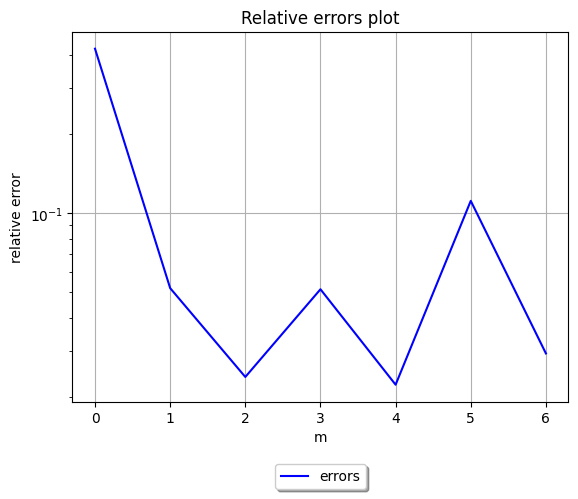

In [16]:
# Least squares polynomial fit approximation
errors = []
for m in m_range:
    c = np.polyfit(years, population, m)
    polynomial = lambda x: np.sum(c*np.array([x**i for i in range(m,-1,-1)]))
    extrapolated_value = polynomial(1990)
    errors.append(np.abs((true_value-extrapolated_value)/true_value))

# Calculating minimal error
min_error = min(errors)
min_error_m = m_range[errors.index(min_error)]
print(f"for m={min_error_m}: error={min_error}")    

# Errors plot
plt.title("Relative errors plot")
plt.plot(m_range, errors, color="blue", label="errors")
plt.yscale("log")
plt.xlabel("m")
plt.ylabel("relative error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

for m=2: aicc=299.2615307564261


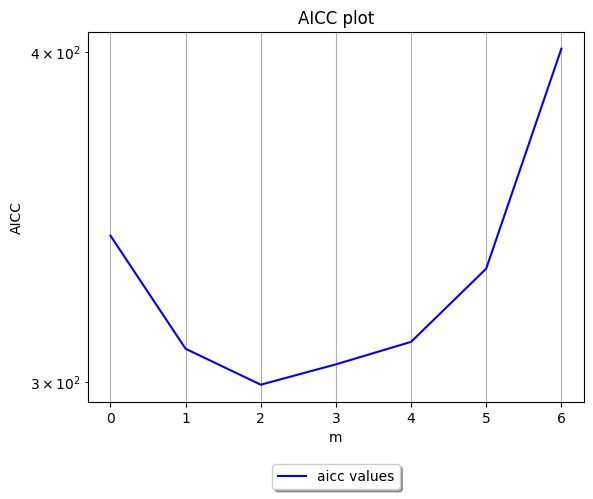

In [17]:
n = 9

# Akaike information criterion - AIC
aicc_list = []
for m in m_range:
    c = np.polyfit(years, population, m)
    polynomial = np.vectorize(lambda x: np.sum(c*np.array([x**i for i in range(m,-1,-1)])))
    predicted_values = polynomial(years)
    sse = np.sum((population-predicted_values)**2)
    k = m+1
    aic = 2*k + n*np.log(sse)
    aicc = aic + 2*k*(k+1)/(n-k-1)
    aicc_list.append(aicc)


# Calculating minimal value
min_value = min(aicc_list)
min_value_m = m_range[aicc_list.index(min_value)]
print(f"for m={min_value_m}: aicc={min_value}")

# AICc plot
plt.title("AICC plot")
plt.plot(m_range, aicc_list, color="blue", label="aicc values")
plt.yscale("log")
plt.xlabel("m")
plt.ylabel("AICC")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 2.**

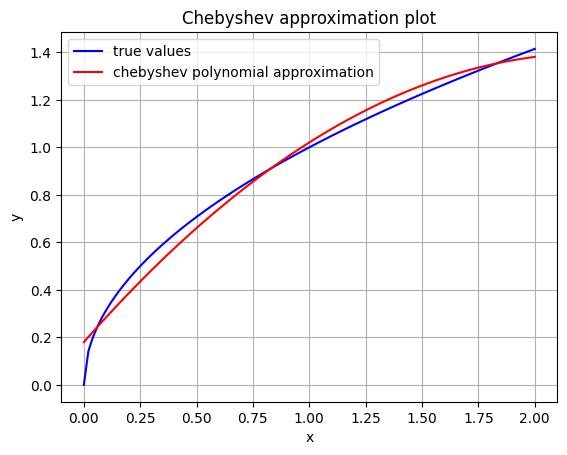

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Data
n = 2 # polynomial degree
f = lambda x: np.sqrt(x)
x_t = lambda t: t*(b-a)/2 + (a+b)/2 # x(t)
t_x = lambda x: (x-(a+b)/2) / ((b-a)/2) # t(x)
a, b = 0.0, 2.0
x_values = np.linspace(a, b, 100)

# Chebyshev polynomial
def chebyshev_polynomial(x, n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2*x*chebyshev_polynomial(x, n-1) - chebyshev_polynomial(x, n-2)

c_chebyshev = []
for i in range(n+1):
    g = lambda x: chebyshev_polynomial(x, i) * f(x_t(x)) / np.sqrt(1-x**2)
    coefficient = 1/np.pi * quad(g, -1.0, 1.0)[0] 
    if i != 0: coefficient*=2
    c_chebyshev.append(coefficient)

# Approximation
approximation = []
for x in x_values:
    val = 0.0
    for i in range(n+1):
        val += c_chebyshev[i]*chebyshev_polynomial(t_x(x), i)
    approximation.append(val)


# Plot
plt.title("Chebyshev approximation plot")
plt.plot(x_values, f(x_values), color='blue', label='true values')
plt.plot(x_values, approximation, color='red', label='chebyshev polynomial approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
